<a href="https://colab.research.google.com/github/SanghunOh/exec_bigdataservice/blob/main/Notescale/Notescale_LSTM_02.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
note_seq = ['g8', 'e8', 'e4', 'f8', 'd8', 'd4', 'c8', 'd8', 'e8', 'f8', 'g8', 'g8', 'g4',
       'g8', 'e8', 'e8', 'e8', 'f8', 'd8', 'd4', 'c8', 'e8', 'g8', 'g8', 'e8', 'e8', 'e4',
       'd8', 'd8', 'd8', 'd8', 'd8', 'e8', 'f4', 'e8', 'e8', 'e8', 'e8', 'e8', 'f8', 'g4',
       'g8', 'e8', 'e4', 'f8', 'd8', 'd4', 'c8', 'e8', 'g8', 'g8', 'e8', 'e8', 'e4']

In [2]:
note_seq[0:5], note_seq[1:6], note_seq[2:7]

(['g8', 'e8', 'e4', 'f8', 'd8'],
 ['e8', 'e4', 'f8', 'd8', 'd4'],
 ['e4', 'f8', 'd8', 'd4', 'c8'])

In [3]:
code2idx = {'c4':0, 'd4':1, 'e4':2, 'f4':3, 'g4':4, 'a4':5, 'b4':6,
            'c8':7, 'd8':8, 'e8':9, 'f8':10, 'g8':11, 'a8':12, 'b8':13}

In [4]:
len(note_seq), range(len(note_seq)-5)

(54, range(0, 49))

In [5]:
dataset = list()
for i in range(len(note_seq)-4):
  # print(note_seq[i:i+5])
  subset = note_seq[i:i+5]
  items = list()
  for item in subset:
    code2idx[item]
    items.append(code2idx[item])
  # print(items)
  dataset.append(items)
print(dataset)

[[11, 9, 2, 10, 8], [9, 2, 10, 8, 1], [2, 10, 8, 1, 7], [10, 8, 1, 7, 8], [8, 1, 7, 8, 9], [1, 7, 8, 9, 10], [7, 8, 9, 10, 11], [8, 9, 10, 11, 11], [9, 10, 11, 11, 4], [10, 11, 11, 4, 11], [11, 11, 4, 11, 9], [11, 4, 11, 9, 9], [4, 11, 9, 9, 9], [11, 9, 9, 9, 10], [9, 9, 9, 10, 8], [9, 9, 10, 8, 1], [9, 10, 8, 1, 7], [10, 8, 1, 7, 9], [8, 1, 7, 9, 11], [1, 7, 9, 11, 11], [7, 9, 11, 11, 9], [9, 11, 11, 9, 9], [11, 11, 9, 9, 2], [11, 9, 9, 2, 8], [9, 9, 2, 8, 8], [9, 2, 8, 8, 8], [2, 8, 8, 8, 8], [8, 8, 8, 8, 8], [8, 8, 8, 8, 9], [8, 8, 8, 9, 3], [8, 8, 9, 3, 9], [8, 9, 3, 9, 9], [9, 3, 9, 9, 9], [3, 9, 9, 9, 9], [9, 9, 9, 9, 9], [9, 9, 9, 9, 10], [9, 9, 9, 10, 4], [9, 9, 10, 4, 11], [9, 10, 4, 11, 9], [10, 4, 11, 9, 2], [4, 11, 9, 2, 10], [11, 9, 2, 10, 8], [9, 2, 10, 8, 1], [2, 10, 8, 1, 7], [10, 8, 1, 7, 9], [8, 1, 7, 9, 11], [1, 7, 9, 11, 11], [7, 9, 11, 11, 9], [9, 11, 11, 9, 9], [11, 11, 9, 9, 2]]


In [6]:
import numpy as np
datasets = np.array(dataset)

In [7]:
x_train = datasets[:,:4]
x_train.shape, x_train

((50, 4), array([[11,  9,  2, 10],
        [ 9,  2, 10,  8],
        [ 2, 10,  8,  1],
        [10,  8,  1,  7],
        [ 8,  1,  7,  8],
        [ 1,  7,  8,  9],
        [ 7,  8,  9, 10],
        [ 8,  9, 10, 11],
        [ 9, 10, 11, 11],
        [10, 11, 11,  4],
        [11, 11,  4, 11],
        [11,  4, 11,  9],
        [ 4, 11,  9,  9],
        [11,  9,  9,  9],
        [ 9,  9,  9, 10],
        [ 9,  9, 10,  8],
        [ 9, 10,  8,  1],
        [10,  8,  1,  7],
        [ 8,  1,  7,  9],
        [ 1,  7,  9, 11],
        [ 7,  9, 11, 11],
        [ 9, 11, 11,  9],
        [11, 11,  9,  9],
        [11,  9,  9,  2],
        [ 9,  9,  2,  8],
        [ 9,  2,  8,  8],
        [ 2,  8,  8,  8],
        [ 8,  8,  8,  8],
        [ 8,  8,  8,  8],
        [ 8,  8,  8,  9],
        [ 8,  8,  9,  3],
        [ 8,  9,  3,  9],
        [ 9,  3,  9,  9],
        [ 3,  9,  9,  9],
        [ 9,  9,  9,  9],
        [ 9,  9,  9,  9],
        [ 9,  9,  9, 10],
        [ 9,  9, 10,  4],
   

In [8]:
y_train = datasets[:,4]
y_train.shape, y_train

((50,),
 array([ 8,  1,  7,  8,  9, 10, 11, 11,  4, 11,  9,  9,  9, 10,  8,  1,  7,
         9, 11, 11,  9,  9,  2,  8,  8,  8,  8,  8,  9,  3,  9,  9,  9,  9,
         9, 10,  4, 11,  9,  2, 10,  8,  1,  7,  9, 11, 11,  9,  9,  2]))

In [9]:
x_train = x_train / 13
x_train[2] 

array([0.15384615, 0.76923077, 0.61538462, 0.07692308])

In [10]:
X_train = np.reshape(x_train, (50, 4, 1))
X_train.shape, X_train[2]

((50, 4, 1), array([[0.15384615],
        [0.76923077],
        [0.61538462],
        [0.07692308]]))

In [11]:
import tensorflow as tf

In [12]:
model = tf.keras.models.Sequential()

In [13]:
model.add(tf.keras.Input(shape=(4, 1)))
model.add(tf.keras.layers.LSTM(128))
model.add(tf.keras.layers.Dense(14, activation='softmax'))

model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['acc'])

In [14]:
model.fit(X_train, y_train, epochs=1000, batch_size=10)

Epoch 1/1000
5/5 [==============================] - 2s 6ms/step - loss: 2.6242 - acc: 0.2200
Epoch 2/1000
5/5 [==============================] - 0s 5ms/step - loss: 2.5727 - acc: 0.3400
Epoch 3/1000
5/5 [==============================] - 0s 5ms/step - loss: 2.5099 - acc: 0.3400
Epoch 4/1000
5/5 [==============================] - 0s 5ms/step - loss: 2.4410 - acc: 0.3400
Epoch 5/1000
5/5 [==============================] - 0s 5ms/step - loss: 2.3591 - acc: 0.3400
Epoch 6/1000
5/5 [==============================] - 0s 6ms/step - loss: 2.2395 - acc: 0.3400
Epoch 7/1000
5/5 [==============================] - 0s 5ms/step - loss: 2.1212 - acc: 0.3400
Epoch 8/1000
5/5 [==============================] - 0s 5ms/step - loss: 2.0121 - acc: 0.3400
Epoch 9/1000
5/5 [==============================] - 0s 5ms/step - loss: 2.0164 - acc: 0.3400
Epoch 10/1000
5/5 [==============================] - 0s 7ms/step - loss: 1.9728 - acc: 0.3400
Epoch 11/1000
5/5 [==============================] - 0s 5ms/step - lo

# evaluation

In [15]:
model.evaluate(X_train, y_train)

2/2 [==============================] - 0s 8ms/step - loss: 0.3826 - acc: 0.8600


[0.38257208466529846, 0.8600000143051147]

In [16]:
X_train[0:1]

array([[[0.84615385],
        [0.69230769],
        [0.15384615],
        [0.76923077]]])

In [17]:
pred = model.predict(X_train[0:1])

In [18]:
np.argmax(pred)

8

In [19]:
pred1 = model.predict(X_train[1:2])

In [20]:
np.argmax(pred1)

1

In [21]:
pred2 = model.predict(X_train[2:3])

In [22]:
np.argmax(pred2)

7

In [23]:
from sklearn.metrics import classification_report, confusion_matrix

In [24]:
y_pred = model.predict(X_train)
y_pred.shape, y_pred[5]

((50, 14), array([9.5384958e-06, 2.2994385e-05, 3.6984480e-07, 7.6962152e-04,
        4.0971777e-06, 1.6877608e-05, 1.2159547e-05, 1.7707018e-04,
        1.2576241e-02, 5.3861726e-04, 7.6898068e-01, 2.1687025e-01,
        7.5980679e-06, 1.3769166e-05], dtype=float32))

In [25]:
y_pred_argmax = np.argmax(y_pred, axis=1)
y_pred_argmax.shape, y_pred_argmax[5]

((50,), 10)

In [26]:
y_train.shape, y_train[5]

((50,), 10)

In [27]:
print(classification_report(y_train, y_pred_argmax))

              precision    recall  f1-score   support

           1       1.00      1.00      1.00         3
           2       1.00      1.00      1.00         3
           3       0.00      0.00      0.00         1
           4       1.00      0.50      0.67         2
           7       1.00      1.00      1.00         3
           8       0.70      0.78      0.74         9
           9       0.83      0.88      0.86        17
          10       1.00      0.75      0.86         4
          11       0.89      1.00      0.94         8

    accuracy                           0.86        50
   macro avg       0.82      0.77      0.78        50
weighted avg       0.85      0.86      0.85        50



/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1272: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [28]:
y_train

array([ 8,  1,  7,  8,  9, 10, 11, 11,  4, 11,  9,  9,  9, 10,  8,  1,  7,
        9, 11, 11,  9,  9,  2,  8,  8,  8,  8,  8,  9,  3,  9,  9,  9,  9,
        9, 10,  4, 11,  9,  2, 10,  8,  1,  7,  9, 11, 11,  9,  9,  2])

In [29]:
confusion_matrix(y_train, y_pred_argmax)

array([[ 3,  0,  0,  0,  0,  0,  0,  0,  0],
       [ 0,  3,  0,  0,  0,  0,  0,  0,  0],
       [ 0,  0,  0,  0,  0,  0,  1,  0,  0],
       [ 0,  0,  0,  1,  0,  1,  0,  0,  0],
       [ 0,  0,  0,  0,  3,  0,  0,  0,  0],
       [ 0,  0,  0,  0,  0,  7,  2,  0,  0],
       [ 0,  0,  0,  0,  0,  1, 15,  0,  1],
       [ 0,  0,  0,  0,  0,  1,  0,  3,  0],
       [ 0,  0,  0,  0,  0,  0,  0,  0,  8]])

In [30]:
import seaborn as sns

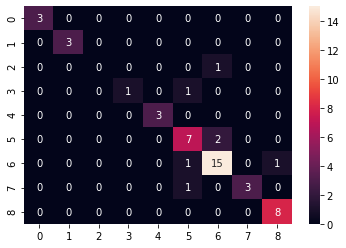

In [31]:
sns.heatmap(confusion_matrix(y_train, y_pred_argmax), annot=True)